In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/heart.csv')

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

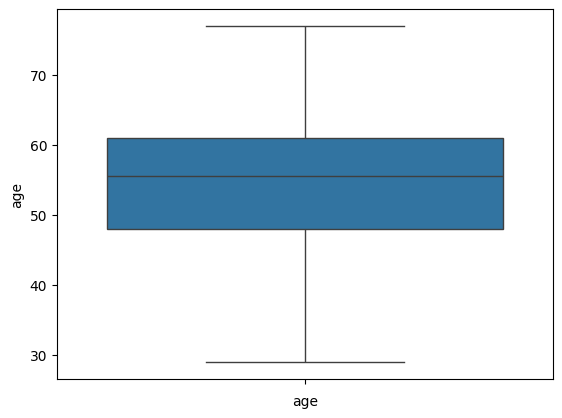

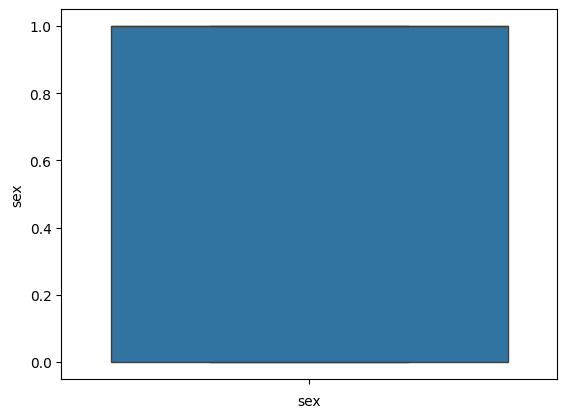

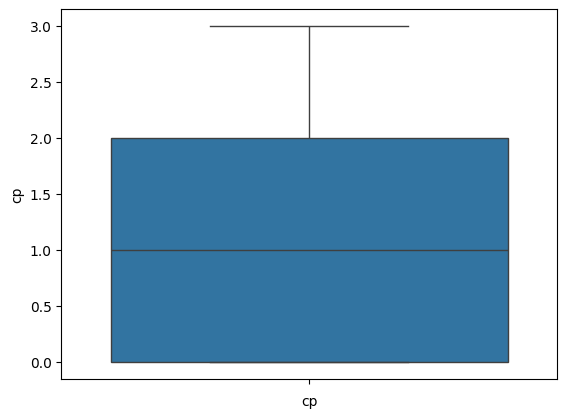

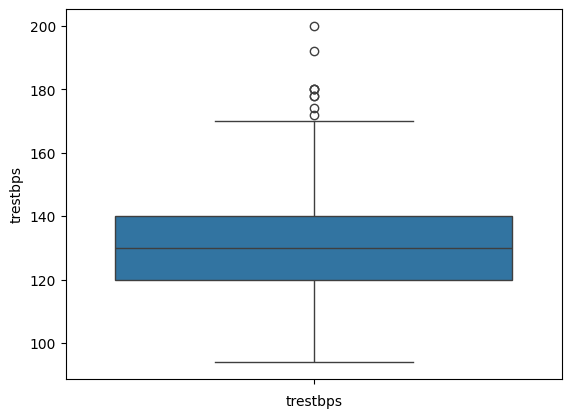

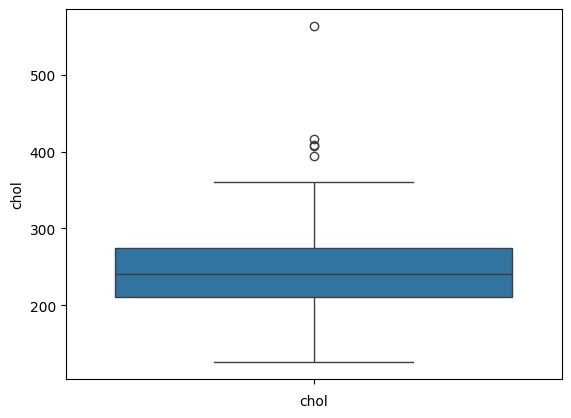

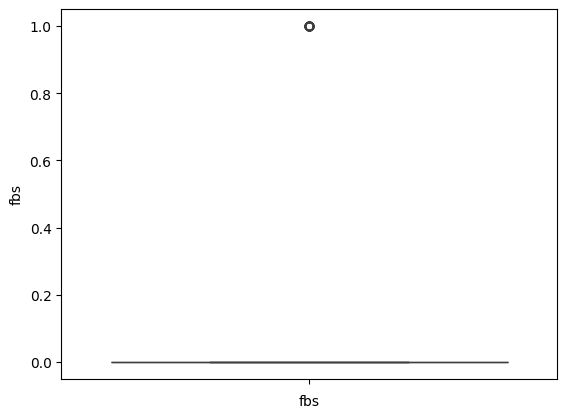

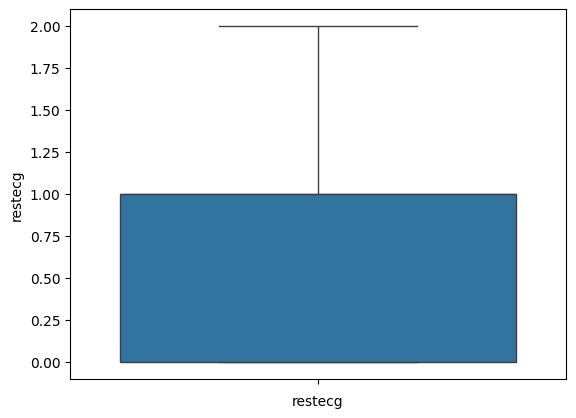

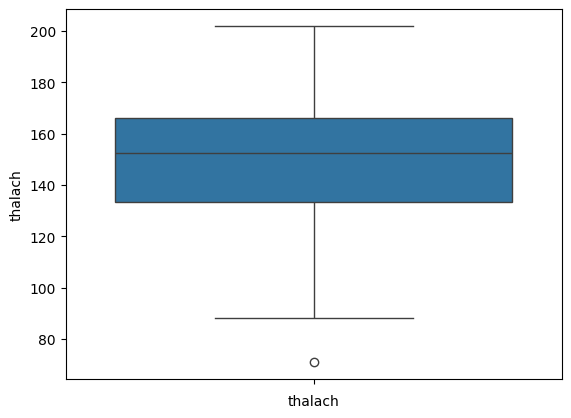

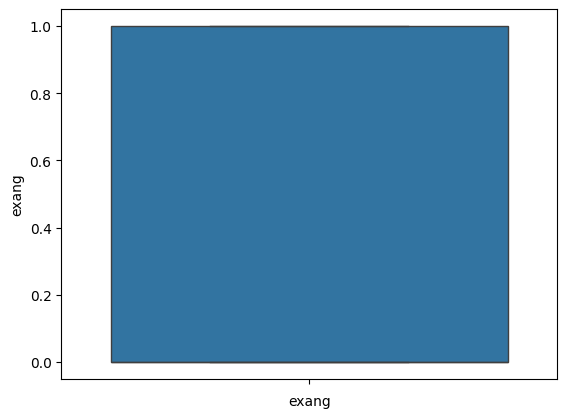

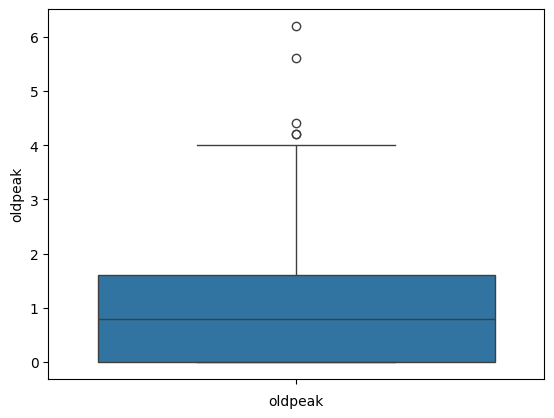

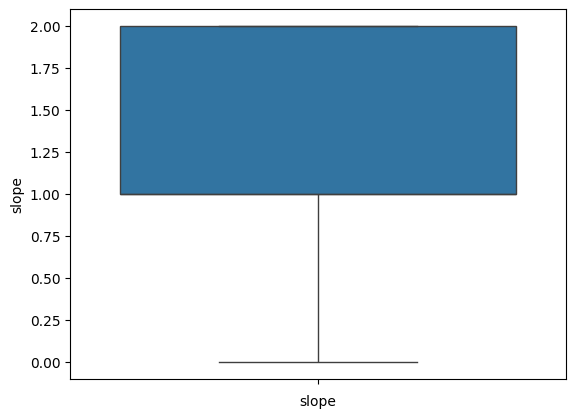

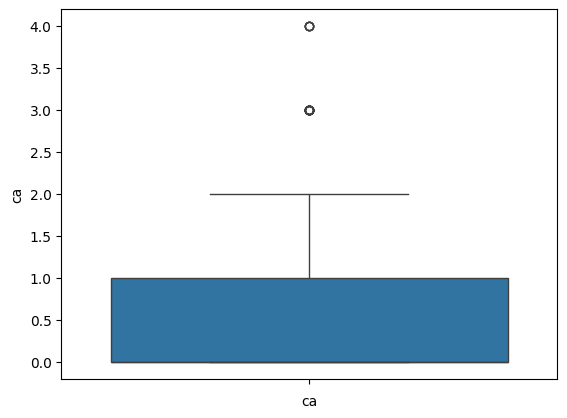

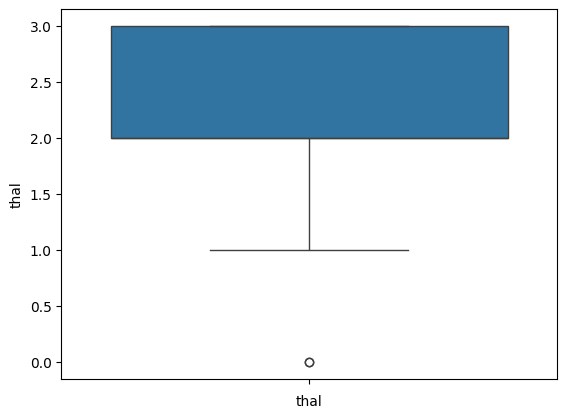

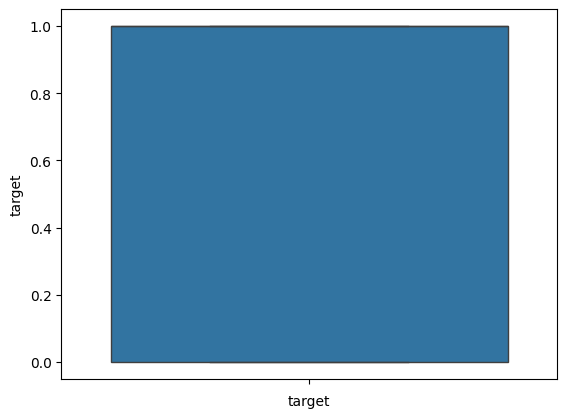

In [ ]:
for col in df.columns:
  if (df[col].dtype!='object'):
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [ ]:
out_list=['trestbps','chol','thalach','oldpeak','ca','thal']

In [ ]:
for col in out_list:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)

  IQR=Q3-Q1

  LB=Q1-1.5*(IQR)
  UB=Q3+1.5*(IQR)

  df=df[(df[col]>=LB) & (df[col]<=UB)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       261 non-null    int64  
 1   sex       261 non-null    int64  
 2   cp        261 non-null    int64  
 3   trestbps  261 non-null    int64  
 4   chol      261 non-null    int64  
 5   fbs       261 non-null    int64  
 6   restecg   261 non-null    int64  
 7   thalach   261 non-null    int64  
 8   exang     261 non-null    int64  
 9   oldpeak   261 non-null    float64
 10  slope     261 non-null    int64  
 11  ca        261 non-null    int64  
 12  thal      261 non-null    int64  
 13  target    261 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 30.6 KB


In [ ]:
x=df.drop('target',axis=1)
y=df['target']

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [ ]:
#training ==> x_train,y_train
#testing -==> x_test,  key =y_test

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model=DecisionTreeClassifier(max_depth=7)

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)*100

75.9493670886076

In [ ]:
# Tunning - Brute Force
depth=[1,2,3,4,5,6,7,8,9,10]
# for loop
for i in depth:
  temp_model=DecisionTreeClassifier(max_depth=i)
  temp_model.fit(x_train,y_train)
  y_pred_temp=temp_model.predict(x_test)
  acc=accuracy_score(y_pred_temp,y_test)*100
  print('The accuracy of max depth',i,"is",acc)


The accuracy of max depth 1 is 75.9493670886076
The accuracy of max depth 2 is 77.21518987341773
The accuracy of max depth 3 is 82.27848101265823
The accuracy of max depth 4 is 74.68354430379746
The accuracy of max depth 5 is 77.21518987341773
The accuracy of max depth 6 is 77.21518987341773
The accuracy of max depth 7 is 75.9493670886076
The accuracy of max depth 8 is 73.41772151898735
The accuracy of max depth 9 is 73.41772151898735
The accuracy of max depth 10 is 73.41772151898735


In [ ]:
final_model=DecisionTreeClassifier(max_depth=3)

In [ ]:
final_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred_final=final_model.predict(x_test)

In [ ]:
accuracy_score(y_pred_final,y_test)*100

82.27848101265823

In [ ]:
from sklearn.tree import plot_tree

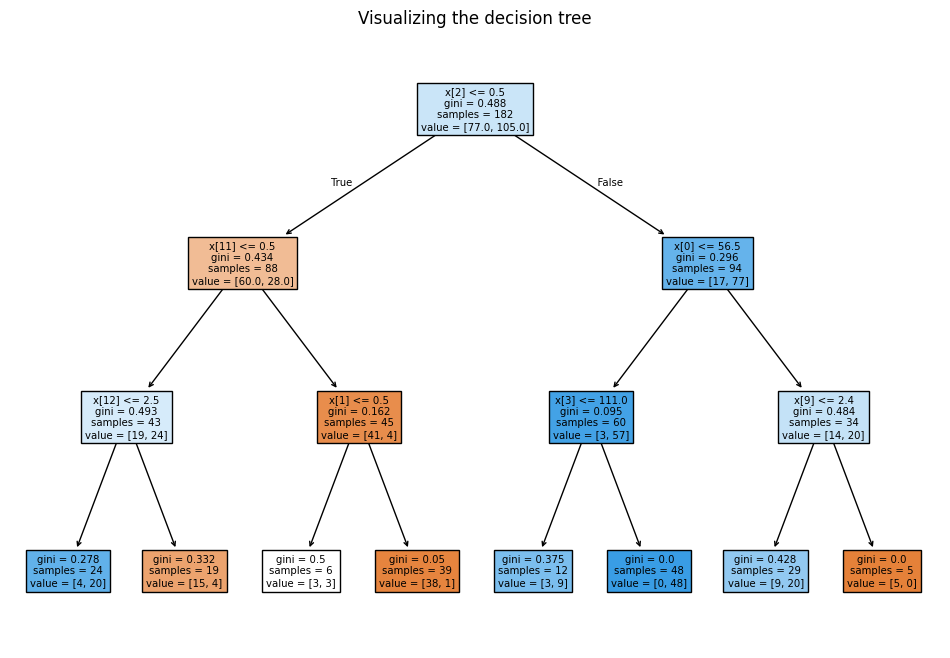

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(final_model,filled=True)
plt.title("Visualizing the decision tree")
plt.show()